In [1]:
import csv, datetime, pandas as pd

# Read data for January 8

In [2]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-08-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(2313, 12)


Finding out unique sources

In [4]:
unique_src = data.src.unique()
print(len(unique_src))

922


Unique ip sources frequency table

In [5]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

        Unique src  Count
405  185.107.94.10    245
362  181.214.87.12     49
909    95.215.1.37     47
874   89.160.72.72     43
714  46.166.165.47     41


In [6]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   1997
0       amun    316


Grouping by timestamp

In [7]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-07 06:51:09      3
1 2018-01-07 06:51:49      1
2 2018-01-07 06:52:29      1
3 2018-01-07 06:53:49      2
4 2018-01-07 06:54:09      1


In [3]:
time_series = data.groupby(data.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0      0     90
1      1     98
2      2     96
3      3     99
4      4     91
5      5     91
6      6     97
7      7    149
8      8     89
9      9    109
10    10    110
11    11    115
12    12     74
13    13     62
14    14     73
15    15    102
16    16    112
17    17     94
18    18     92
19    19     87
20    20     97
21    21    116
22    22     82
23    23     88


## Bar chart of time stamp count

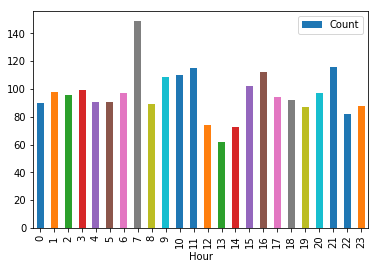

In [5]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')